In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from os import listdir
from os.path import join
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

In [3]:
TIME = 'Time [s]'
POWER = 'Power [W]'

In [4]:
df = pd.read_csv('chart_2021-06-14_16-20-47.csv')

min_time = df.sort_values(by='Timestamp')['Timestamp'].to_list()[0]
df[TIME] = (df['Timestamp'] - min_time) / 1000

df[POWER] = df['elab.conway.power']

df

,Timestamp,elab.conway.power,Time [s],Power [W]
0,1.623679e+12,97.459715,0.0000,97.459715
1,1.623679e+12,115.434535,0.8009,115.434535
2,1.623679e+12,111.159964,1.6017,111.159964
3,1.623679e+12,117.256680,2.4026,117.256680
4,1.623679e+12,178.782262,3.2034,178.782262
...,...,...,...,...
739,1.623680e+12,361.384351,591.8287,361.384351
740,1.623680e+12,360.238996,592.6296,360.238996
741,1.623680e+12,438.331703,593.4304,438.331703
742,1.623680e+12,439.435972,594.2313,439.435972


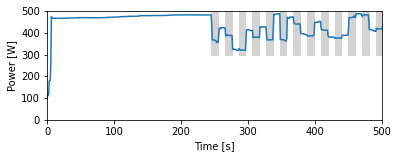

In [5]:
fig = plt.figure(figsize=(6, 2))
ax = fig.add_subplot()

sns.lineplot(data=df, x=TIME, y=POWER, ax=ax)
ax.set_ylim(0, 500)

y_min, y_max = ax.get_ylim()
height = y_max - y_min
for i in range(20):
    marker = mpatches.Rectangle((240+i*20.5+5,y_min), 10, height, color='lightgray')
    ax.add_patch(marker)

ax.set_xlim(0, 500)

plt.savefig('../../paper/fig/runtime_firestarter.pdf', bbox_inches='tight')